**INSTRUCTIONS**

# **1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [7]:
# To read data from diamonds.csv
import pandas as pd
import numpy as np
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?', header=None,  names = headers)
data = data.reset_index(drop=True)
data = data.iloc[1:]
print(data)
data.describe()

      carat        cut color clarity depth table price     x     y     z
1      0.23      Ideal     E     SI2  61.5    55   326  3.95  3.98  2.43
2      0.21    Premium     E     SI1  59.8    61   326  3.89  3.84  2.31
3      0.23       Good     E     VS1  56.9    65   327  4.05  4.07  2.31
4      0.29    Premium     I     VS2  62.4    58   334   4.2  4.23  2.63
5      0.31       Good     J     SI2  63.3    58   335  4.34  4.35  2.75
...     ...        ...   ...     ...   ...   ...   ...   ...   ...   ...
53936  0.72      Ideal     D     SI1  60.8    57  2757  5.75  5.76   3.5
53937  0.72       Good     D     SI1  63.1    55  2757  5.69  5.75  3.61
53938   0.7  Very Good     D     SI1  62.8    60  2757  5.66  5.68  3.56
53939  0.86    Premium     H     SI2    61    58  2757  6.15  6.12  3.74
53940  0.75      Ideal     D     SI2  62.2    55  2757  5.83  5.87  3.64

[53940 rows x 10 columns]


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767




```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [135]:
# code for knn regression

def handleCategoricalData():
    from sklearn import preprocessing
    labelEncoder = preprocessing.LabelEncoder()
    data_handled = data.copy()
    data_handled['color'] = labelEncoder.fit_transform(data['color'])
    cut_dict = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
    data_handled['cut'] = data.cut.map(cut_dict)
    clarity_dict = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
    data_handled['clarity'] = data.clarity.map(clarity_dict)
    convertToFloat_cols = ['carat','x','y','z','depth','table','price']
    for feature in data_handled:
        if feature in convertToFloat_cols:
            data_handled[feature] = data_handled[feature].astype(float)
    return data_handled

def normalizeData():
    data_norm = data_handled.copy()
    for feature in data_norm.columns:
        if feature != 'price':
            data_norm[feature] = (data_handled[feature] - data_handled[feature].min())/(data_handled[feature].max() - data_handled[feature].min())
    return data_norm

def distance(r1,r2):
    return np.sum((r1 - r2)**2)

def kNN_Regression(test_row):
    import heapq
    min_distances = []
    heapq.heapify(min_distances)
    prices_train_data = train_set['price'].to_numpy(copy=True)
    train_data_without_price = train_set[[i for i in list(train_set.columns) if i != 'price']].to_numpy(copy = True)

    for i,train_row in enumerate(train_data_without_price):
        dist = distance(train_row,test_row)
#         print(dist)
        heapq.heappush(min_distances,(dist,prices_train_data[i]))
    min_k_dist = heapq.nsmallest(k,min_distances)
#     print(min_k_dist)
    predicted = np.array([tup[1] for tup in min_k_dist])
#     print(predicted)
    return np.average(predicted)
    
def findBestK_on_ValidationSet():
    return 13

data_handled = handleCategoricalData()
# print(data_handled)
data_norm = normalizeData()
# print(data_norm)
train_set = data_norm.sample(frac = 0.8,random_state = 250)
validation_set = data_norm.drop(train_set.index)

test_set = validation_set.sample(frac = 0.1,random_state=150)
validation_set = validation_set.drop(test_set.index)

k = findBestK_on_ValidationSet()

# print(test_set)
# print(validation_set)
# print(train_set)

prices_test_data = test_set['price'].to_numpy(copy=True)
data_to_be_tested = test_set[[i for i in list(test_set.columns) if i != 'price']].to_numpy(copy = True)

predicted_price_kNN = []
import time
start_time = time.time()
for i,row in enumerate(data_to_be_tested):
    predicted_price_kNN.append(kNN_Regression(row))
predicted_price_kNN = np.array(predicted_price_kNN)
print("--- %s seconds ---" % (time.time() - start_time))
# print(predicted_price)
# print(prices_test_data)


--- 266.475084066391 seconds ---



1. b) Do we need to normalise data? [If so Does it make any difference?].


**Explanation:** Yes, we need to normalise the data. Otherwise the columns having the larger values will always dominate in the distance function.Thus, the weightage of the columns with low data values will significantly decrease.

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [299]:
# show all the experiments
print("Explanation: \nI handled categorical data by mapping data values to integer in ordinal fashion and then taking Euclidean Distance. And it also turns out to be having good r2 score of the model.\nComparing to the Manhattan and Hamming, they might not give correct distances considering the ordinality of data.")

Explanation: 
I handled categorical data by mapping data values to integer in ordinal fashion and then taking Euclidean Distance. And it also turns out to be having good r2 score of the model.
Comparing to the Manhattan and Hamming, they might not give correct distances considering the ordinality of data.


3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [137]:
# report a table
diff = predicted_price_kNN-prices_test_data
mse = np.mean(diff**2)
mae = np.mean(abs(diff))
r2 = 1-(sum(diff**2)/sum((prices_test_data-np.mean(prices_test_data))**2))
from prettytable import PrettyTable

l = [["MSE",mse], ["MAE", mae], ["R2", r2]]

table = PrettyTable(['Error metric','Error Value'])

for rec in l:
    table.add_row(rec)
    
print(table)
print(mse,mae,r2)

+--------------+--------------------+
| Error metric |    Error Value     |
+--------------+--------------------+
|     MSE      | 632390.1945314256  |
|     MAE      | 416.3784843516076  |
|      R2      | 0.9610166631571923 |
+--------------+--------------------+
632390.1945314256 416.3784843516076 0.9610166631571923


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

[0.9683784180135064, 0.9692959023427798, 0.9694402174229783, 0.968696523750985, 0.9630394365401984, 0.9590267861103006]


(0.5, 1.0)

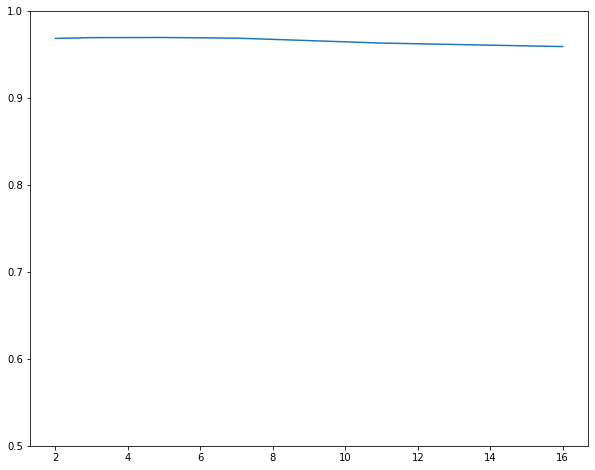

In [322]:
# plot
import matplotlib.pyplot as plt 

def predict_pricee(dists,k_val):
    pricess = np.zeros([dists.shape[0],1])
    for i,row in enumerate(dists):
        idx = np.argpartition(row ,k_val)
        least_k_dists = y_train_mykNN[idx[:k_val]]
        pricess[i] = np.mean(least_k_dists)
    return pricess

X_train_mykNN = train_set.drop(['price'],axis=1).to_numpy()
y_train_mykNN = train_set['price'].to_numpy()
# print(X_train_mykNN.shape, y_train_mykNN.shape)

X_test_mykNN = test_set.drop(['price'],axis=1).to_numpy()
y_test_mykNN = test_set['price'].to_numpy()
# print(X_test_mykNN.shape, y_test_mykNN.shape)
k_values = [2,3,5,7,11,16]
r2_for_each_k = []
for k_val in k_values:
    dists = -2* np.dot(X_test_mykNN,X_train_mykNN.T) + np.sum(X_train_mykNN**2,axis = 1) + np.sum(X_test_mykNN**2,axis = 1)[:,np.newaxis]
    predicted_prices = predict_pricee(dists,k_val)
    predicted_prices = predicted_prices.flatten()

    diff = predicted_prices-y_test_mykNN
    mse = np.mean(diff**2)
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_test_mykNN-np.mean(y_test_mykNN))**2))
#     print("mse,mae,r2 = ",mse,mae,r2)
    r2_for_each_k.append(r2)

print(r2_for_each_k)
plt.plot(k_values,r2_for_each_k)
plt.ylim(0.5,1)

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

**Explanation:** R2 values are coming out to be almost same for the values of k. We compute best k by using cross validation, i.e. keeping some part of training data, called as validation set to tune the value of k. Like, calculating errors for different values of k on the validation set and chose the k with least error on the validation set.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [327]:
# scikit-learn KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_train_mykNN, y_train_mykNN)

predicted_price_knn_sk = regressor.predict(X_test_mykNN)

diff = predicted_price_knn_sk - y_test_mykNN
mse_kNN_sk = np.mean(diff**2)
mae_kNN_sk = np.mean(abs(diff))
r2_kNN_sk = 1-(sum(diff**2)/sum((y_test_mykNN-np.mean(y_test_mykNN))**2))
print("mse , mae, r2 = ",mse,mae,r2)

mse , mae, r2 =  664670.1078146722 429.8968373493976 0.9590267861103006


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [329]:
# Comparison
l = [["MSE",mse, mse_kNN_sk], ["MAE", mae, mae_kNN_sk], ["R2",r2, r2_kNN_sk]]

table = PrettyTable(['Error metric','Error Value with my KNN','Error Value with Scikit-learns kNN'])

for rec in l:
    table.add_row(rec)
    
print(table)

+--------------+-------------------------+------------------------------------+
| Error metric | Error Value with my KNN | Error Value with Scikit-learns kNN |
+--------------+-------------------------+------------------------------------+
|     MSE      |    664670.1078146722    |         513050.0727525487          |
|     MAE      |    429.8968373493976    |         380.68396663577386         |
|      R2      |    0.9590267861103006   |          0.96837331765057          |
+--------------+-------------------------+------------------------------------+


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


**Advantages:**
First of all the concept of kNN is quite simple and easy to understand, and we only have to decide on majorly two things. The value for k and the distance metric to use.

**Disadvantages:**
Computation time was quite high as we have to traverse the whole training dataset for each test case.
(But later on, after doing further questions of the assignment, came to know about no loop method which boosted up the speed.)

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [140]:
print(data_selected)    # Contains only suitable and independent variables. Calculated in 2(b)
train_data_selected = data_selected.sample(frac = 0.8,random_state = 251)
test_data_selected = data_selected.drop(train_data_selected.index)
columns = np.full((data_selected.shape[1],), True, dtype=bool)
columns[1] = False
X_features_train = train_data_selected[train_data_selected.columns[columns]].to_numpy()
X_features_train = np.c_[np.ones(X_features_train.shape[0]), X_features_train]

X_features_test = test_data_selected[test_data_selected.columns[columns]].to_numpy()
X_features_test = np.c_[np.ones(X_features_test.shape[0]), X_features_test]
print("X_feature train",X_features_train.shape)
print(X_features_train)
print("X_feature test",X_features_test.shape)
print(X_features_test)

Y_values_train = train_data_selected['price'].to_numpy()
Y_values_test = test_data_selected['price'].to_numpy()
print("Y_values train")
print(Y_values_train)
print("Y values test")
print(Y_values_test)

learning_rate = 0.06
iterations = 3
weights = np.zeros(X_features_train.shape[1])
print(weights)

def slope(i):
    return X_features_train[i] * (np.dot(weights,X_features_train[i]) - Y_values_train[i])

for _ in range(iterations):
    for i in range(X_features_train.shape[0]):
        weights -= (learning_rate * slope(i))
    print(weights)
predicted_price_LR = np.ones(Y_values_test.shape[0])
for i in range(Y_values_test.shape[0]):
    predicted_price_LR[i] = np.dot(weights,X_features_test[i])
print(predicted_price_LR)

diff = predicted_price_LR-Y_values_test
mse_LR = np.mean(diff**2)
mae_LR = np.mean(abs(diff))
r2_LR = 1-(sum(diff**2)/sum((Y_values_test-np.mean(Y_values_test))**2))
print("MSE, MAE, R2 = ",mse_LR,mae_LR,r2_LR)

          carat   price         y         z
1      0.006237   326.0  0.067572  0.076415
2      0.002079   326.0  0.065195  0.072642
3      0.006237   327.0  0.069100  0.072642
4      0.018711   334.0  0.071817  0.082704
5      0.022869   335.0  0.073854  0.086478
...         ...     ...       ...       ...
53936  0.108108  2757.0  0.097793  0.110063
53937  0.108108  2757.0  0.097623  0.113522
53938  0.103950  2757.0  0.096435  0.111950
53939  0.137214  2757.0  0.103905  0.117610
53940  0.114345  2757.0  0.099660  0.114465

[53940 rows x 4 columns]
X_feature train (43152, 4)
[[1.         0.02286902 0.07402377 0.08522013]
 [1.         0.0956341  0.09575552 0.10974843]
 [1.         0.16632017 0.10950764 0.12232704]
 ...
 [1.         0.37629938 0.13904924 0.15408805]
 [1.         0.20790021 0.11782683 0.13050314]
 [1.         0.18918919 0.11273345 0.13144654]]
X_feature test (10788, 4)
[[1.         0.00623701 0.06757216 0.07641509]
 [1.         0.01247401 0.06977929 0.07955975]
 [1.       

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [43]:
#code for Correlation between features and the Diamond Price.
corr = data_norm.corr(method = 'pearson')
# print(corr)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    if corr['price'][i] < 0.5:
        columns[i] = False
# print(columns)
temp = data_norm.columns[columns]
data_selected = data_norm[temp]

# Removing highly dependent features
corr = data_selected.corr(method = 'pearson')
print(corr)
columns = np.full((corr.shape[0],), True, dtype=bool)
print(columns)
for i in range(corr.shape[0]):
    if data_selected.columns[i] != 'price' and columns[i]:
        for j in range(i+1, corr.shape[0]):
            if data_selected.columns[j] != 'price':
                if corr.iloc[i,j] >= 0.97:
                    columns[j] = False
# print(columns)
temp = data_selected.columns[columns]
data_selected = data_selected[temp]
print(data_selected)

          carat     price         x         y         z
carat  1.000000  0.921591  0.975094  0.951722  0.953387
price  0.921591  1.000000  0.884435  0.865421  0.861249
x      0.975094  0.884435  1.000000  0.974701  0.970772
y      0.951722  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.861249  0.970772  0.952006  1.000000
[ True  True  True  True  True]
          carat   price         y         z
1      0.006237   326.0  0.067572  0.076415
2      0.002079   326.0  0.065195  0.072642
3      0.006237   327.0  0.069100  0.072642
4      0.018711   334.0  0.071817  0.082704
5      0.022869   335.0  0.073854  0.086478
...         ...     ...       ...       ...
53936  0.108108  2757.0  0.097793  0.110063
53937  0.108108  2757.0  0.097623  0.113522
53938  0.103950  2757.0  0.096435  0.111950
53939  0.137214  2757.0  0.103905  0.117610
53940  0.114345  2757.0  0.099660  0.114465

[53940 rows x 4 columns]


**Explanation for 2b)** - Features used for prediction are carat, y, z. Because the features cut, color, clarity, depth and table have quite less correlation with the price. And feature x was excluded because it was highly correlated to the other feautures (corr > 0.97).

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [141]:
# import sklearn model
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_features_train,Y_values_train)

predicted_price_sk_LR = regr.predict(X_features_test)

diff = predicted_price_sk_LR - Y_values_test
mse_sk_LR = np.mean(diff**2)
mae_sk_LR = np.mean(abs(diff))
r2_sk_LR = 1-(sum(diff**2)/sum((Y_values_test-np.mean(Y_values_test))**2))
# print("MSE, MAE, R2 = ",mse_sk_LR,mae_sk_LR,r2_sk_LR)
from prettytable import PrettyTable
l = [["MSE",mse_LR,mse_sk_LR], ["MAE", mae_LR, mae_sk_LR], ["R2", r2_LR, r2_sk_LR]]
table = PrettyTable(['Error metric','Error with my model','Error with sklearn LinearRegression'])
for rec in l:
    table.add_row(rec)
    
print(table)

+--------------+---------------------+-------------------------------------+
| Error metric | Error with my model | Error with sklearn LinearRegression |
+--------------+---------------------+-------------------------------------+
|     MSE      |  2467030.9480067496 |          2297680.2887646146         |
|     MAE      |  1046.3520448807938 |          932.6438743554684          |
|      R2      |  0.843450713958602  |          0.8541971234499045         |
+--------------+---------------------+-------------------------------------+


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [254]:
train_data_sk = data_norm.sample(frac = 0.8,random_state = 251)
test_data_sk = data_norm.drop(train_data_sk.index)
columns = np.array([1,1,1,1,1,1,0,1,1,1])
X_train_sk = train_data_sk[train_data_sk.columns[columns]].to_numpy()
# X_train_sk = np.c_[np.ones(X_train_sk.shape[0]), X_train_sk]
# print("X_train ",X_train_sk.shape)

X_test_sk = test_data_sk[test_data_sk.columns[columns]].to_numpy()
# X_test_sk = np.c_[np.ones(X_test_sk.shape[0]), X_test_sk]

Y_values_train_sk = train_data_sk['price'].to_numpy()
Y_values_test_sk = test_data_sk['price'].to_numpy()
# print("Y_test ",Y_values_test_sk.shape)

regr.fit(X_train_sk,Y_values_train_sk)
predicted_price_sk_LR_full = regr.predict(X_test_sk)

diff = predicted_price_sk_LR_full - Y_values_test_sk

mse_sk_LR_full = np.mean(diff**2)
mae_sk_LR_full = np.mean(abs(diff))
r2_sk_LR_full = 1-(sum(diff**2)/sum((Y_values_test_sk-np.mean(Y_values_test_sk))**2))

l = [["MSE",mse_LR,mse_sk_LR,mse_sk_LR_full], ["MAE", mae_LR, mae_sk_LR, mae_sk_LR_full], ["R2", r2_LR, r2_sk_LR, r2_sk_LR_full]]
table = PrettyTable(['Error metric','Error with my model','Error with sklearn LinearRegression','Sklearn LR with all features'])
for rec in l:
    table.add_row(rec)
    
print(table)
print("Adding Extra features make the predictions slightly better. This might be because the features we removed on the basis of pearson correlation might have some impact on the price.")

+--------------+---------------------+-------------------------------------+------------------------------+
| Error metric | Error with my model | Error with sklearn LinearRegression | Sklearn LR with all features |
+--------------+---------------------+-------------------------------------+------------------------------+
|     MSE      |  2467030.9480067496 |          2297680.2887646146         |      2281542.2417114554      |
|     MAE      |  1046.3520448807938 |          932.6438743554684          |      986.0339653948301       |
|      R2      |  0.843450713958602  |          0.8541971234499045         |      0.8552211883268845      |
+--------------+---------------------+-------------------------------------+------------------------------+
Adding Extra features make the predictions slightly better. This might be because the features we removed on the basis of pearson correlation might have some impact on the price.


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


**Explanation -** KNN regression gives out much better error values and r2 score than Linear Regression, e.g. the Mean square error for kNN regression is around 0.66 x 10^6 and for linear regression it is around 2.4 x 10^6. A lot of difference there!
So, KNN regression performs much better in this particular case. But the only drawback with it is the computation time. In linear regression training may take some time but after obtaining weights matrix, it takes no time to predict values. So, linear regression performs good in terms of time compared to kNN.

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


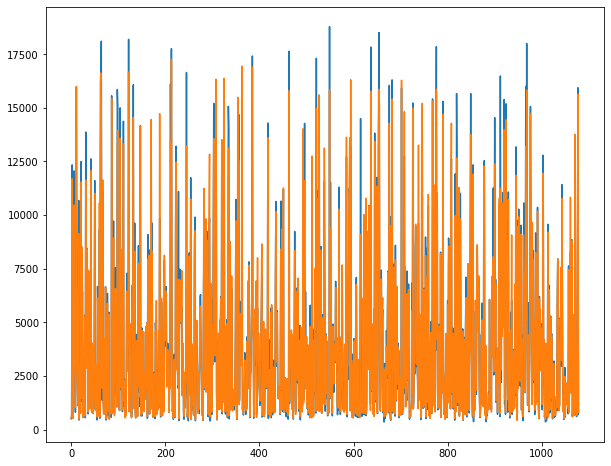

In [337]:
#plot 
import matplotlib.pyplot as plt
plt.plot(y_test_mykNN)
plt.plot(predicted_price_kNN)
# print(predicted_price_LR.shape, predicted_price_kNN.shape, y_test_mykNN.shape)
plt.show()
# print("Yo")

# **KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [145]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os

from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-08 22:32:03--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  1.40MB/s    in 9m 17s  

2021-02-08 22:41:20 (299 KB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [171]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

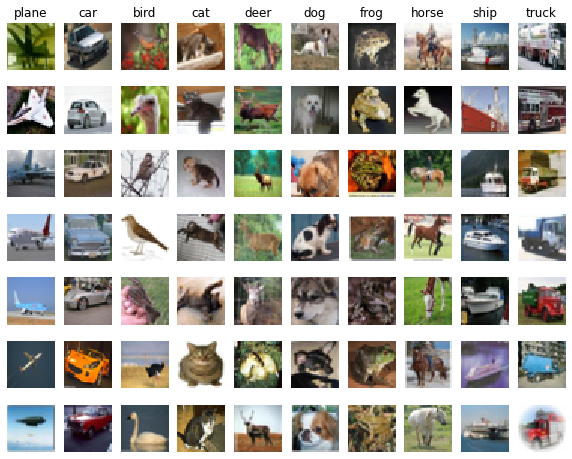

In [172]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [195]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

[6 9 9 ... 5 4 6]
(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [226]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    " a kNN classifier with L2 distance "
    def train(self,X,Y):
        self.X_train = X
        self.y_train = Y
        
    def compute_distances_two_loops(self,X_test):
        dists = np.zeros([X_test.shape[0],X_train.shape[0]])
        for i,test in enumerate(X_test):
            for j,train in enumerate(X_train):
                dists[i][j] = self.L2distance(test,train)
        return dists
    def compute_distances_single_loop(self,X_test):
        dists = np.zeros([X_test.shape[0],X_train.shape[0]])
        for i in range(X_test.shape[0]):
            dists[i,:] = np.sum((X_train - X_test[i,:])**2,axis = 1)
        return dists
    def compute_distances_no_loop(self,X_test):
        dists = -2* np.dot(X_test,X_train.T) + np.sum(X_train**2,axis = 1) + np.sum(X_test**2,axis = 1)[:,np.newaxis]
        return dists
    
    def L2distance(self,t1, t2):
        return np.sum((t1-t2)**2)
    
    def predict_labels(self,dists,k):
        from scipy import stats
        labels = np.zeros([dists.shape[0],1])
        for i,row in enumerate(dists):
            idx = np.argpartition(row ,k)
            least_k_classes = y_train[idx[:k]]
            labels[i] = stats.mode(least_k_classes)[0]
        return labels

    def __init__(self):
        pass

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [227]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
# print(classifier.X_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [194]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)
# print(dists)

(500, 5000)
[[14469834. 17729119. 30294615. ... 16061239. 17667570. 18959080.]
 [40155461. 27775852. 16326740. ... 23320722. 22034553. 60347005.]
 [27298944. 18067965. 14242667. ... 14188899. 19936218. 40367876.]
 ...
 [28803995. 25632726. 40473234. ... 26281702. 20587147. 35057549.]
 [13483064. 14888853. 23492261. ... 12397759. 10127462. 19790514.]
 [48454469. 37011572. 40171948. ... 37009642. 17042427. 64658521.]]


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [219]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)
y_test_pred = y_test_pred.flatten()
# print(y_test_pred)
# print(y_test)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [220]:
# Use this cell to compute accuracies for k = 3, 5, 7
k_values = [3,5,7]
for k_val in k_values:
    y_test_pred = classifier.predict_labels(dists, k_val)
    y_test_pred = y_test_pred.flatten()
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct => accuracy: %f for k = %d' % (num_correct, num_test, accuracy,k_val))

Got 136 / 500 correct => accuracy: 0.272000 for k = 3
Got 139 / 500 correct => accuracy: 0.278000 for k = 5
Got 137 / 500 correct => accuracy: 0.274000 for k = 7


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [228]:
# Use this cell to call the functions
dists_single_loop = classifier.compute_distances_single_loop(X_test)
print("Distances single loop ",dists_single_loop.shape)
print(dists_single_loop)

dists_no_loop = classifier.compute_distances_no_loop(X_test)
print("Distances no loop ",dists_no_loop.shape)
print(dists_no_loop)

Distances single loop  (500, 5000)
[[14469834. 17729119. 30294615. ... 16061239. 17667570. 18959080.]
 [40155461. 27775852. 16326740. ... 23320722. 22034553. 60347005.]
 [27298944. 18067965. 14242667. ... 14188899. 19936218. 40367876.]
 ...
 [28803995. 25632726. 40473234. ... 26281702. 20587147. 35057549.]
 [13483064. 14888853. 23492261. ... 12397759. 10127462. 19790514.]
 [48454469. 37011572. 40171948. ... 37009642. 17042427. 64658521.]]
Distances no loop  (500, 5000)
[[14469834. 17729119. 30294615. ... 16061239. 17667570. 18959080.]
 [40155461. 27775852. 16326740. ... 23320722. 22034553. 60347005.]
 [27298944. 18067965. 14242667. ... 14188899. 19936218. 40367876.]
 ...
 [28803995. 25632726. 40473234. ... 26281702. 20587147. 35057549.]
 [13483064. 14888853. 23492261. ... 12397759. 10127462. 19790514.]
 [48454469. 37011572. 40171948. ... 37009642. 17042427. 64658521.]]


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [236]:
# Use this cell to present your timing results for computing distance matrix
# l = [["MSE",mse_LR,mse_sk_LR,mse_sk_LR_full], ["MAE", mae_LR, mae_sk_LR, mae_sk_LR_full], ["R2", r2_LR, r2_sk_LR, r2_sk_LR_full]]
table = PrettyTable(['K value','Time taken by 2 Loops method','Time taken by single Loop method','Time taken by No Loops method'])
k_values = [3,5]
for k_val in k_values:
    table_record = [str(k_val)]
    start_time = time.time()
    dists = classifier.compute_distances_two_loops(X_test)
    table_record.append(str(time.time()-start_time)+" seconds")
    
    start_time = time.time()
    dists_single_loop = classifier.compute_distances_single_loop(X_test)
    table_record.append(str(time.time()-start_time)+" seconds")
    
    start_time = time.time()
    dists_no_loop = classifier.compute_distances_no_loop(X_test)
    table_record.append(str(time.time()-start_time)+" seconds")
    
    table.add_row(table_record)
    
print(table)
print("\n\nSince, calculation of the distance matrix is independent of the value of k, which is used only in predict function, I am reporting the table for only 2 values of k.")

+---------+------------------------------+----------------------------------+-------------------------------+
| K value | Time taken by 2 Loops method | Time taken by single Loop method | Time taken by No Loops method |
+---------+------------------------------+----------------------------------+-------------------------------+
|    3    |  20.676847219467163 seconds  |    20.608196020126343 seconds    |  0.15195178985595703 seconds  |
|    5    |  20.541912078857422 seconds  |    20.495227813720703 seconds    |  0.15308785438537598 seconds  |
+---------+------------------------------+----------------------------------+-------------------------------+


Since, calculation of the distance matrix is independent of the value of k, which is used only in predict function, I am reporting the table for only 2 values of k.


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

[2.74 2.72 2.78 2.74] [3.5740458866668177, 3.40613329157859, 3.553445651758304, 3.460045664438549]


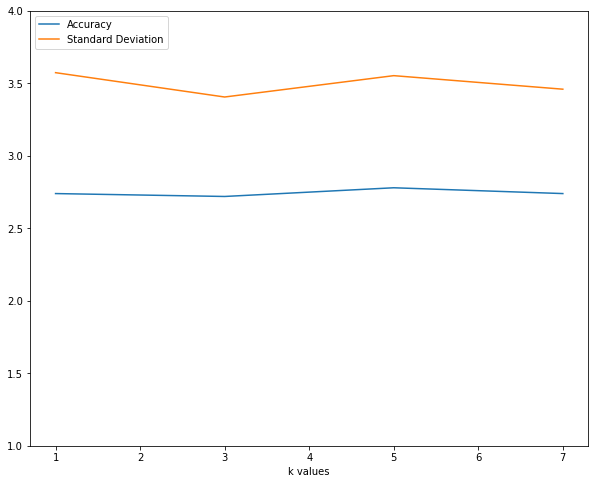

In [343]:
# Use this cell to implement Cross Validation

X_train_folds = np.array_split(X_train,5)
y_train_folds = np.array_split(y_train,5)

def leave_one_out(ind):
    X_train_CV = X_train_folds[4]
    y_train_CV = y_train_folds[4]
    for i in range(4):
        if i != ind:
            X_train_CV = np.concatenate((X_train_CV,X_train_folds[i]))
            y_train_CV = np.concatenate((y_train_CV,y_train_folds[i]))
    return X_train_CV, y_train_CV

k_values = [1,3,5,7]
accuracy_for_each_k = []
SD_for_each_k = []
for i, k_val in enumerate(k_values):
    X_train_CV, y_train_CV = leave_one_out(i)
    classifier.train(X_train_CV, y_train_CV)
    dists = classifier.compute_distances_no_loop(X_test)
    y_test_pred = classifier.predict_labels(dists, k_val)
    y_test_pred = y_test_pred.flatten()
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    accuracy_for_each_k.append(accuracy)
    SD_for_each_k.append(np.std((y_test_pred-y_test), dtype = np.float64))

accuracy_for_each_k = np.array(accuracy_for_each_k)
accuracy_for_each_k *= 10
print(accuracy_for_each_k,SD_for_each_k)

import matplotlib.pyplot as plt
plt.plot(k_values, accuracy_for_each_k,label = "Accuracy")
plt.plot(k_values, SD_for_each_k, label = "Standard Deviation")
plt.legend(loc="upper left")
plt.xlabel('k values')
plt.ylim(1,4)
plt.show()

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [294]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)

train_data_WBC = data.sample(frac = 0.8,random_state = 151)
test_data_WBC = data.drop(train_data_WBC.index)

print(train_data_WBC)
# print(test_data_WBC)

     CT  UCSize  UCShape  MA  SECSize   BN  BC  NN  Mitoses  Diagnosis
426   5       3        6   1        2  1.0   1   1        1          2
678   1       1        1   1        2  1.0   1   1        1          2
667   3       1        1   1        2  1.0   3   1        1          2
32   10       7        7   3        8  5.0   7   4        3          4
484   5       1        2   1        2  1.0   1   1        1          2
..   ..     ...      ...  ..      ...  ...  ..  ..      ...        ...
393   1       1        1   1        1  1.0   1   1        1          2
627   2       1        1   1        2  5.0   1   1        1          2
503   4       1        1   1        2  1.0   3   1        1          2
564   4       1        1   1        2  1.0   3   2        1          2
347   1       1        1   1        1  1.0   1   3        1          2

[559 rows x 10 columns]


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [360]:
class decisionTree(object):
    " Decision Tree from scratch "
    def train(self,train_data, max_depth, metric, num_classes = 2):
        print(self.tree)
        self.max_depth = max_depth
        if metric == 'entropy':
            self.tree = self.buildTree_entropy(train_data,0)
        elif metric == 'gini':
            self.tree = self.buildTree_gini(train_data,0)
        elif metric == 'misclassification_rate':
            self.tree = self.buildTree_misclassification_rate(train_data,0)
        else:
            print('Invalid error metric')
    
    def majority_class(self,data_dt):
        class_col = data_dt['Diagnosis'].to_numpy()
        class_col_uniq,counts = np.unique(class_col, return_counts=True)
        return class_col_uniq[np.argmax(counts)]
    
    def best_col_and_val_entropy(self, data_dt):
        pass
    
    def buildTree_entropy(self,data_dt, curr_depth):
        if (curr_depth == self.max_depth) or len(data_dt) < num_classes:
            return majority_class(data_dt)
        root = dict()
        best_split_col, split_col_val = self.best_col_and_val_entropy(data_dt)
        root["{} < {}".format(best_split_col, split_col_val)] = []
        left_data = data_dt[best_split_col < split_col_val]
        root["{} < {}".format(best_split_col, split_col_val)].append(left_data)
        right_data = data_dt[best_split_col >= split_col_val]
        root["{} < {}".format(best_split_col, split_col_val)].append(right_data)
        return root
        
    def buildTree_gini(self,data_dt,curr_depth):
        if (curr_depth == self.max_depth) or len(data_dt) < num_classes:
            return majority_class(data_dt)
        root = dict()
        best_split_col, split_col_val = self.best_col_and_val_entropy(data_dt)
        root["{} < {}".format(best_split_col, split_col_val)] = []
        left_data = data_dt[best_split_col < split_col_val]
        root["{} < {}".format(best_split_col, split_col_val)].append(left_data)
        right_data = data_dt[best_split_col >= split_col_val]
        root["{} < {}".format(best_split_col, split_col_val)].append(right_data)
        return root
    def buildTree_misclassification_rate(self,data_dt,curr_depth):
        if (curr_depth == self.max_depth) or len(data_dt) < num_classes:
            return majority_class(data_dt)
        root = dict()
        best_split_col, split_col_val = self.best_col_and_val_entropy(data_dt)
        root["{} < {}".format(best_split_col, split_col_val)] = []
        left_data = data_dt[best_split_col < split_col_val]
        root["{} < {}".format(best_split_col, split_col_val)].append(left_data)
        right_data = data_dt[best_split_col >= split_col_val]
        root["{} < {}".format(best_split_col, split_col_val)].append(right_data)
        return root
    
    def find_in_tree(self,test_data):
        pass
    
    def predict(self,test_df):
        predicted_classes = []
        for test_data in test_df:
            predicted_classes.append(self.find_in_tree(test_data))
        return predicted_classes
        
    
    def __init__(self):
        self.tree = dict()
        pass
        

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [361]:
dt_classifier = decisionTree()
dt_classifier.train(train_data_WBC,5,'entropy')
predicted_using_entropy = dt_classifier.predict(test_data_WBC)

dt_classifier.train(train_data_WBC,5,'gini')
predicted_using_gini = dt_classifier.predict(test_data_WBC)

dt_classifier.train(train_data_WBC,5,'misclassification_rate')
predicted_using_mr = dt_classifier.predict(test_data_WBC)

{}
None
None


1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

1. e) Does standardisation and normalisation help in this case? Report

Answer:

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [348]:
from sklearn import tree

X_train_dt = train_data_WBC.drop('Diagnosis',axis=1).to_numpy()
y_train_dt = train_data_WBC['Diagnosis'].to_numpy()

X_test_dt = test_data_WBC.drop('Diagnosis',axis=1).to_numpy()
y_test_dt = test_data_WBC['Diagnosis'].to_numpy()

dt_classifier_sk = tree.DecisionTreeClassifier()
dt_classifier_sk = dt_classifier_sk.fit(X_train_dt, y_train_dt)
# tree.plot_tree(dt_classifier_sk)

predicted_class_sk = dt_classifier_sk.predict(X_test_dt)
# print(predicted_class_sk)

# num_test = y_test_dt.shape[0]
print(num_test)
num_correct = np.sum(predicted_class_sk == y_test_dt)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

140
Got 135 / 140 correct => accuracy: 0.964286


3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

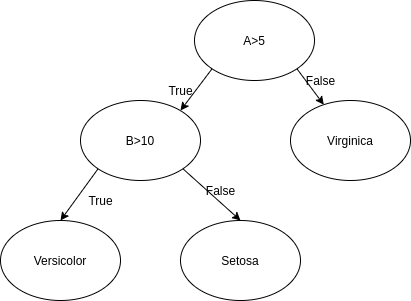
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

In [284]:
data.corr(method = 'pearson')

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
CT,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
UCSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
UCShape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
MA,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
SECSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
BN,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
BC,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
NN,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170
Diagnosis,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000


5. Report the advantages and disadvantages of decision trees based on the above question.

Answer: